In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from scipy.stats import wilcoxon, ttest_rel
import seaborn as sns
import matplotlib.gridspec as gridspec

## Performance

### Learning curve

In [3]:
#TAMER
path = "Results/Evaluative/"
performance_eval = []
for participant_id in range(1,12):
    performance_path = os.path.join(path,f'participant_{str(participant_id)}' ,'performance' )
    f = open(performance_path, 'rb')
    performance = pickle.load(f)
    f.close()
    performance_eval.append(performance)

In [4]:
evaluative = np.array(performance_eval)
evaluative_mean = np.mean(evaluative , axis=0)
evaluative_std = np.std(evaluative, axis=0)

In [5]:
#ECLAIR
path = "Results/GPT/"
performance_gpt = []
for participant_id in range(1,12):
    performance_path = os.path.join(path,f'participant_{str(participant_id)}' ,'performance' )
    f = open(performance_path, 'rb')
    performance = pickle.load(f)
    f.close()
    performance_gpt.append(performance)

In [6]:
gpt = np.array(performance_gpt)
gpt_mean = np.mean(gpt , axis=0)
gpt_std = np.std(gpt, axis=0)

In [7]:
expert = np.full(gpt_mean.shape[0],-9)

/tmp/ipykernel_6122/1372310729.py:17: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l2, l3, l4],     # The line objects


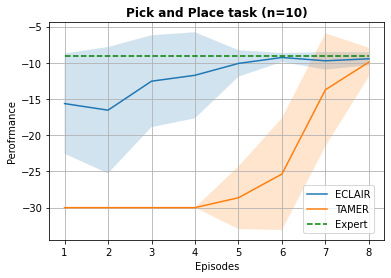

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))

x = np.arange(1, gpt_mean.shape[0]+1)

#l1 = ax.plot(steps_env[:500:2], env_mean[:500:2], label='env')
l2 = ax.plot(x, gpt_mean, label='ECLAIR')
l3 = ax.plot(x, evaluative_mean, label='TAMER')
l4 = ax.plot(x, expert, color ='g', linestyle='dashed', label='Expert')



ax.fill_between(x, gpt_mean+ gpt_std, gpt_mean- gpt_std, alpha=0.2)
ax.fill_between(x, evaluative_mean+evaluative_std, evaluative_mean - evaluative_std, alpha=0.2)

labels = ["ECLAIR", "TAMER", "Expert"]

fig.legend([l2, l3, l4],     # The line objects
           labels=labels,   # The labels for each line
           #loc="center right",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           ncol=1, # Title for the legend
           fancybox=True,
           bbox_to_anchor=(0.9, 0.35),
           bbox_transform=fig.transFigure
           )

#ax.legend(loc='upper right')
ax.set_xlabel('Episodes')
ax.set_ylabel('Perofrmance')
ax.set_title("Pick and Place task (n=10)", fontweight="bold")
ax.grid()
fig.savefig("Images/performance.png",bbox_inches='tight')

### Success rate

In [10]:
#ECLAIR
path = "Results/GPT/"
success_eclair = []
for participant_id in range(1,12):
    success_path = os.path.join(path,f'participant_{str(participant_id)}' ,'success' )
    f = open(success_path, 'rb')
    performance = pickle.load(f)
    f.close()
    success_eclair.append(performance)

In [11]:
success_eclair = np.array(success_eclair)
success_eclair_mean = np.mean(success_eclair)
success_eclair_std = np.std(success_eclair)

In [13]:
#TAMER
path = "Results/Evaluative/"
success_tamer = []
for participant_id in range(1,12):
    success_path = os.path.join(path,f'participant_{str(participant_id)}' ,'success' )
    f = open(success_path, 'rb')
    performance = pickle.load(f)
    f.close()
    success_tamer.append(performance)

In [14]:
success_tamer = np.array(success_tamer)
success_tamer_mean = np.mean(success_tamer)
success_tamer_std = np.std(success_tamer)

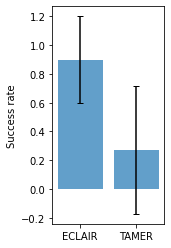

In [18]:
means = [success_eclair.mean(), success_tamer.mean()]
stds = [success_eclair.std(), success_tamer.std()]

fig, ax = plt.subplots(figsize=(2, 4))

x_pos = np.arange(2)

ax.bar(x_pos, means, yerr=stds, capsize=3, align='center', alpha=0.7)
ax.set_xticks(x_pos)
ax.set_xticklabels(["ECLAIR", "TAMER"])
ax.set_ylabel('Success rate')
#ax.set_title('Perturbed dynamics')
plt.show()
fig.savefig("Images/success_performance.pdf",bbox_inches='tight')

In [16]:
statistic, p_value = ttest_rel(np.mean(success_eclair, axis=1), np.mean(success_tamer, axis=1))

In [17]:
p_value

2.2108019978268417e-07

### Heatmap

In [19]:
#ECLAIR
path = "Results/GPT/"
states_eclair = []
for participant_id in range(1,12):
    states_path = os.path.join(path,f'participant_{str(participant_id)}' ,'states_heatmap' )
    f = open(states_path, 'rb')
    performance = pickle.load(f)
    f.close()
    states_eclair.append(performance)

In [20]:
states_eclair = np.array(states_eclair)
states_eclair_mean = np.mean(states_eclair, axis=0)[:25].reshape((5, 5))+ np.mean(states_eclair, axis=0)[25:].reshape((5, 5))

In [21]:
#TAMER
path = "Results/Evaluative/"
states_tamer = []
for participant_id in range(1,12):
    states_path = os.path.join(path,f'participant_{str(participant_id)}' ,'states_heatmap' )
    f = open(states_path, 'rb')
    performance = pickle.load(f)
    f.close()
    states_tamer.append(performance)

In [22]:
states_tamer = np.array(states_tamer)
states_tamer_mean = np.mean(states_tamer, axis=0)[:25].reshape((5, 5))+ np.mean(states_tamer, axis=0)[25:].reshape((5, 5))

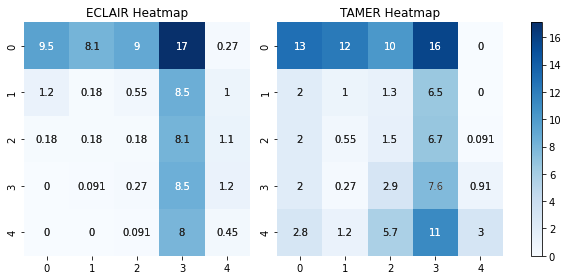

In [33]:
# Set up the figure and gridspec
fig = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05])  # Two plots and one for the color bar

# Plotting the first heatmap
ax0 = plt.subplot(gs[0])
sns.heatmap(states_eclair_mean, annot=True, cmap='Blues', cbar=False, ax=ax0)
ax0.set_title('ECLAIR Heatmap')
ax0.set_xticks([])  # Remove x ticks
ax0.set_yticks([])

# Plotting the second heatmap
ax1 = plt.subplot(gs[1])
sns.heatmap(states_tamer_mean, annot=True, cmap='Blues', cbar=False, ax=ax1)
ax1.set_title('TAMER Heatmap')
ax1.set_xticks([])  # Remove x ticks
ax1.set_yticks([])

# Manually determining the color bar's range to cover both heatmaps
combined_data = np.concatenate((states_eclair_mean.flatten(), states_tamer_mean.flatten()))
vmin, vmax = combined_data.min(), combined_data.max()

# Re-plotting the heatmaps to adjust the color range
sns.heatmap(states_eclair_mean, annot=True, cmap='Blues', cbar=False, vmin=vmin, vmax=vmax, ax=ax0)
sns.heatmap(states_tamer_mean, annot=True, cmap='Blues', cbar=False, vmin=vmin, vmax=vmax, ax=ax1)

# Adding the color bar
cbar_ax = plt.subplot(gs[2])
plt.colorbar(plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)

plt.tight_layout()
plt.show()
fig.savefig("Images/heatmap.png",bbox_inches='tight')

## Feedback Efficency


In [39]:
#ECLAIR
path = "Results/GPT/"
evaluative_eclair = []
for participant_id in range(1,12):
    states_path = os.path.join(path,f'participant_{str(participant_id)}' ,'evaluative')
    f = open(states_path, 'rb')
    performance = pickle.load(f)
    f.close()
    feedback_number = []
    for ep in performance:
        feedback_number.append(len([element for element in ep if element != 'None']))
    evaluative_eclair.append(feedback_number)
    
corrective_eclair = []
for participant_id in range(1,12):
    states_path = os.path.join(path,f'participant_{str(participant_id)}' ,'corrective')
    f = open(states_path, 'rb')
    performance = pickle.load(f)
    f.close()
    feedback_number = []
    for ep in performance:
        feedback_number.append(len([element for element in ep if element != 'None']))
    corrective_eclair.append(feedback_number)
    
guidance_eclair = []
for participant_id in range(1,12):
    states_path = os.path.join(path,f'participant_{str(participant_id)}' ,'advice')
    f = open(states_path, 'rb')
    performance = pickle.load(f)
    f.close()
    feedback_number = []
    for ep in performance:
        feedback_number.append(len([element for element in ep if element != 'None']))
    guidance_eclair.append(feedback_number)

In [40]:
evaluative_eclair = np.array(evaluative_eclair)
corrective_eclair = np.array(corrective_eclair)
guidance_eclair = np.array(guidance_eclair)

In [41]:
#TAMER
path = "Results/Evaluative/"
evaluative_tamer= []
for participant_id in range(1,12):
    states_path = os.path.join(path,f'participant_{str(participant_id)}' ,'feedback')
    f = open(states_path, 'rb')
    performance = pickle.load(f)
    f.close()
    feedback_number = []
    for ep in performance:
        feedback_number.append(len([element for element in ep if element != 'None']))
    evaluative_tamer.append(feedback_number)
  

In [42]:
evaluative_tamer = np.array(evaluative_tamer)

### Number of feedback

In [43]:
#ECLAIR
total_eclair = evaluative_eclair + corrective_eclair + guidance_eclair 
total_eclair_mean = np.mean(total_eclair , axis=0)
total_eclair_std = np.std(total_eclair, axis=0)

In [44]:
#TAMER
evaluative_tamer_mean = np.mean(evaluative_tamer , axis=0)
evaluative_tamer_std = np.std(evaluative_tamer, axis=0)

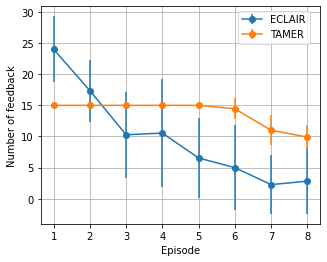

In [48]:
fig, ax = plt.subplots(figsize=(5, 4))

# Plot with standard deviation bars
# ECLAIR
l2 = ax.errorbar(x, total_eclair_mean, yerr=total_eclair_std, label='ECLAIR', fmt='-o')

# TAMER
l3 = ax.errorbar(x, evaluative_tamer_mean, yerr=evaluative_tamer_std, label='TAMER', fmt='-o')

labels = ["ECLAIR", "TAMER"]

fig.legend(labels=labels,   # The labels for each line
           borderaxespad=1,    # Small spacing around legend box
           ncol=1, # Title for the legend
           fancybox=True,
           bbox_to_anchor=(0.9, 0.9),
           bbox_transform=fig.transFigure
           )

ax.set_xlabel('Episode')
ax.set_ylabel('Number of feedback')
ax.grid()
fig.savefig("Images/number_feedback_with_std.png", bbox_inches='tight')
plt.show()

### Feedback distribution for ECLAIR

In [49]:
evaluative_eclair = np.array(evaluative_eclair)
evaluative_eclair_mean = np.mean(evaluative_eclair  , axis=0)
evaluative_eclair_std = np.std(evaluative_eclair , axis=0)

corrective_eclair = np.array(corrective_eclair)
corrective_eclair_mean = np.mean(corrective_eclair  , axis=0)
corrective_eclair_std = np.std(corrective_eclair , axis=0)

guidance_eclair = np.array(guidance_eclair)
guidance_eclair_mean = np.mean(guidance_eclair  , axis=0)
guidance_eclair_std = np.std(guidance_eclair , axis=0)

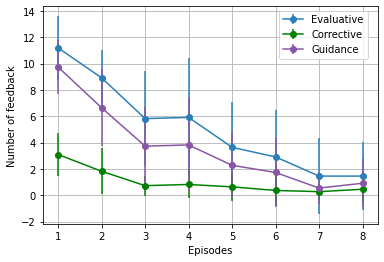

In [56]:
fig, ax = plt.subplots(1)

# Plot with standard deviation bars

l2 = ax.errorbar(x, evaluative_eclair_mean, yerr=evaluative_eclair_std, label='Evaluative', fmt='-o', color=(0.17, 0.498, 0.72, 1))
l3 = ax.errorbar(x, corrective_eclair_mean, yerr=corrective_eclair_std, label='Corrective', fmt='-o', color='g')
l4 = ax.errorbar(x, guidance_eclair_mean, yerr=guidance_eclair_std, label='Guidance', fmt='-o',color=(0.53, 0.337, 0.655, 1))

labels = ["Evaluative", "Corrective", "Guidance"]

fig.legend(labels=labels,   # The labels for each line
           borderaxespad=1,    # Small spacing around legend box
           ncol=1, # Title for the legend
           fancybox=True,
           bbox_to_anchor=(0.9, 0.9),
           bbox_transform=fig.transFigure
           )

ax.set_xlabel('Episodes')
ax.set_ylabel('Number of feedback')
ax.grid()
fig.savefig("Images/feedback_type.png", bbox_inches='tight')
plt.show()

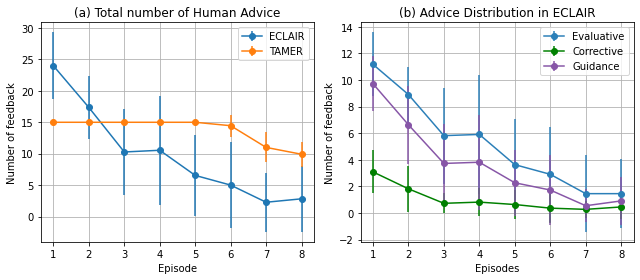

In [66]:
# Creating a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# Plot 1: ECLAIR vs TAMER
ax1.errorbar(x, total_eclair_mean, yerr=total_eclair_std, label='ECLAIR', fmt='-o')
ax1.errorbar(x, evaluative_tamer_mean, yerr=evaluative_tamer_std, label='TAMER', fmt='-o')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Number of feedback')
ax1.grid()
ax1.legend(["ECLAIR", "TAMER"], loc='upper right')
ax1.set_title("(a) Total number of Human Advice")

# Plot 2: Evaluative, Corrective, Guidance for ECLAIR
ax2.errorbar(x, evaluative_eclair_mean, yerr=evaluative_eclair_std, label='Evaluative', fmt='-o', color=(0.17, 0.498, 0.72, 1))
ax2.errorbar(x, corrective_eclair_mean, yerr=corrective_eclair_std, label='Corrective', fmt='-o', color='g')
ax2.errorbar(x, guidance_eclair_mean, yerr=guidance_eclair_std, label='Guidance', fmt='-o', color=(0.53, 0.337, 0.655, 1))
ax2.set_xlabel('Episodes')
ax2.set_ylabel('Number of feedback')
ax2.grid()
ax2.legend(["Evaluative", "Corrective", "Guidance"], loc='upper right')
ax2.set_title("(b) Advice Distribution in ECLAIR")

# Adjust layout
plt.tight_layout()
plt.savefig("Images/combined_plots.png", bbox_inches='tight')
plt.show()
fig.savefig("Images/feedback.pdf",bbox_inches='tight')